# Simple Linear Regression

---

### Determine if there is a linear relationship between head size and brain weight in healthy human adults.


In this notebook, we will explore the relationship between human head size in cubic centimeters (cc) and brain weight in grams (g) by using an Ordinary Least Squares linear regression model. The dataset we will use provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characteristics such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive. 


(Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.)

<br>


### Is head size related to brain weight in healthy adult humans?

##### Hypothesis Testing

- Null Hypothesis (H<sub>0</sub>): There is no relationship between head size and brain weight.
- Alternative Hypothesis (H<sub>a</sub>): There is a statistically significant relationship between head size and brain weight.
- Significance Level ($\alpha$): 0.05


##### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.formula.api import ols

# I. Load and Explore Data

##### Load the data

In [11]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url)

##### Explore the data set

In [12]:
# Preview first 5 rows of dataframe
df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [13]:
# View summary statistics for each column
df.describe()

,Gender,Age,Head,Brain
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [21]:
# View column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  237 non-null    int64
 1   Age     237 non-null    int64
 2   Head    237 non-null    int64
 3   Brain   237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


##### Assign the independent (feature) and dependent (target) variables


In [3]:
feature = df['Head']
target = df['Brain']

##### Create an exploratory scatterplot

In [8]:
def scatterplot(X, y, x_label, y_label):
    """Creates a basic scatterplot with labels and title"""

    plot = plt.figure(figsize=(10,8))
    sns.scatterplot(
        x=X,
        y=y
    )

    plt.xlabel(x_label),
    plt.ylabel(y_label)
    plt.title(f"Relationship between {x_label} and {y_label}")

    return plot

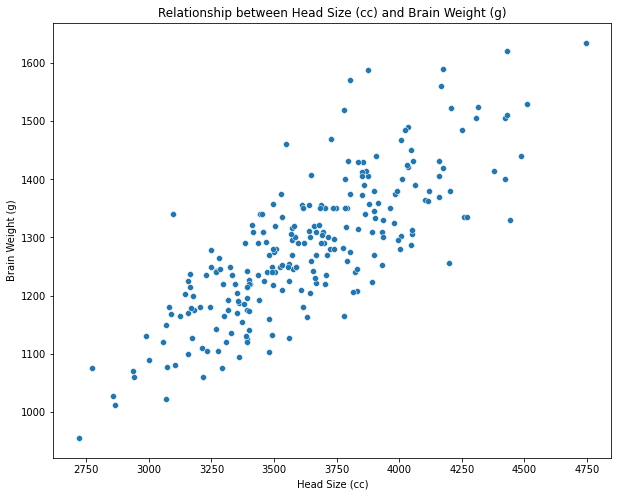

In [9]:
scatterplot(feature, target, 'Head Size (cc)', 'Brain Weight (g)');

##### Describe the plot

There appears to be a positive linear relationship between the independent variable, head size, and the dependent variable, brain weight.


##### Check for Missing Data


In [30]:
num_null = df.isnull().sum().sum()
print(f"There are {num_null} null values in this data set.")

There are 0 null values in this data set.


# II. Analysis

##### Calculate correlation coefficient

Now that we've explored our data through a plot and checked for null values, we can move on to some calculations. First, we're going to calculate and interpret the correlation coefficient for the relationship between *head size* and *brain weight*.

In [47]:
r, p = st.pearsonr(feature, target)

# View the results
print(f'Correlation coefficient: {r}')
print(f'p-value: {p}')


Correlation coefficient: 0.7995697092542963
p-value: 5.957630839406329e-54


##### Linear model

Now that we've calculated the correlation coefficient, we're going to fit a linear model to our two variables. We'll use the `statsmodels` module to calculate the least-squares regression coefficients (slope and intercept). Our two variables are head size (`Head`) and brain weight (`Brain`).


In [11]:
# Set-up and fit the model (Y ~ X)
model = ols('Brain ~ Head', data=df).fit()
slope = model.params[1]
intercept = model.params[0]


# View the model parameters
print(f'The slope is: {slope}')
print(f'The intercept is: {intercept}')

The slope is: 0.26342933948939934
The intercept is: 325.57342104944246


##### Linear equation

$\hat{Y} = 325.57 + 0.26x$



##### Interpreting the equation

The slope tells us that, for every additional cubic cm of head size, we expect brain weight to increase by 0.26g.  It does not make sense to interpret the intercept because 0 is not one of the x-values in our dataset, nor is it a realistic head size.


##### Scatterplot with regression line


In [36]:
def reg_plot(X, y, xlabel: str, ylabel: str):  
    """ Create a basic scatterplot and regression line with labels and title"""

    reg_plot = plt.figure(figsize=(10,8))
    sns.regplot(
        x=X,
        y=y,
        ci=None
    )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Relationship between {xlabel} and {ylabel}');
    return reg_plot


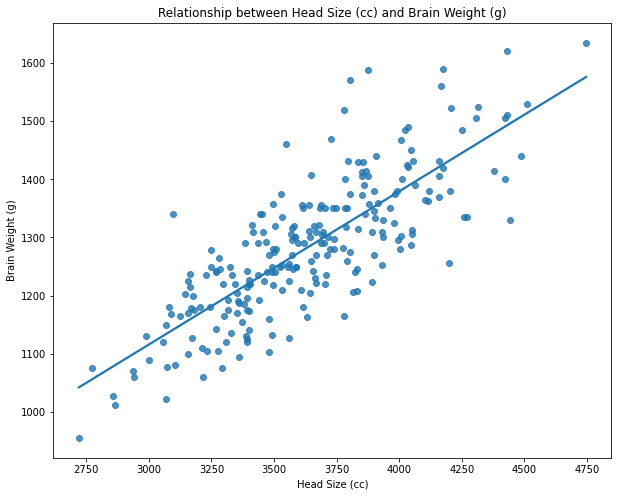

In [37]:
plot = reg_plot(feature, target, 'Head Size (cc)', 'Brain Weight (g)')
plot;

##### Making a prediction

Use the model to make a prediction. A healthy human has a brain size of 4100 cubic cm. How much do we expect this individual's brain to weigh?



In [52]:
x_healthy = 4100

predict_healthy = intercept + slope * x_healthy

print(f'Prediction for a brain size of 4100 cc: {predict_healthy:.2f} g')

Prediction for a brain size of 4100 cc: 1405.63 g


##### Calculating a residual

 Calculate and interpret the model residual for the first observation in the dataset.


In [50]:
x_first = feature[0]
observed_first = target[0]

predict_first = intercept + slope * x_first
residual_first = observed_first - predict_first

# View your prediction and residual 
print(f'Prediction for a brain size of {x_first} cc: {predict_first:.2f} g')
print(f'Residual for the prediction: {residual_first:.2f}')

Prediction for a brain size of 4512 cc: 1514.17 g
Residual for the prediction: 15.83


# III. Results

A correlation coefficient of approximately 0.8 represents a fairly strong positive relationship between head size and brain weight. Also, with a p-value that is less than the standard significance level of 0.05, we can conclude that there appears to be a statistically significant relationship between head size and brain weight. 

<br>
Linear equation for predictions:

*predicted brain weight* = 325.57 + 0.26 * *head size*

<br>
 Our linear equation suggests that we expect the brain weight to increase by 0.26 g for every additional 1 cc in head size within the range of head sizes in this data set (approximately 2750 cc to 4750 cc).

<br>
However, by looking at the vertical distance between our actual data points and our line of predicted values, we can see that there is room for improvement in our model. For instance, the first person in our data set had a head size of 4512 cc and a brain weight of 1530 g. Our residual for this data point, the difference between the actual and predicted values, was 15.83 g.



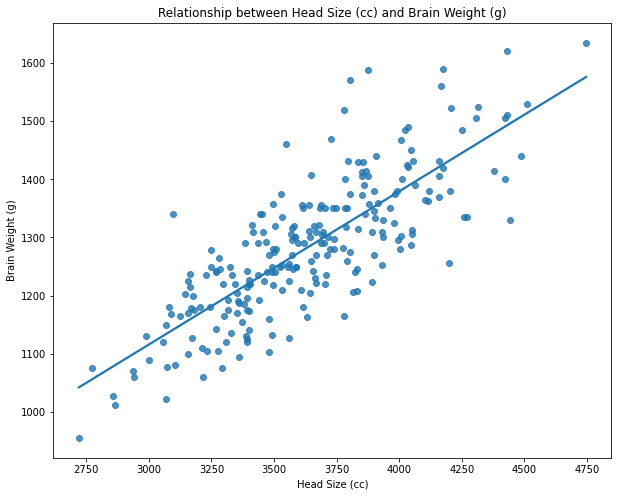

In [39]:
display(plot);

# IV. Next Steps to Further Evaluate and Improve Model

We could try to find a larger and more recent data set to train our model on. We could also explore multiple linear regression by including age or gender as independent variables. We could also explore other evaluation metrics to gain more understanding about the limitations of our current model. Finally, we could implement machine learning algorithms to improve our model and ensure that it is able to generalize to new data.